In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata'

In [4]:
df = pd.read_csv(file_path + "/3hour_coindata.csv")
df

,Unnamed: 0,time_open,time_close,open,high,low,close,volume,market_cap,coin_name,file_name
0,0,2023-01-17T01:00:00.000Z,2023-01-17T01:59:59.999Z,1.633079,1.642449,1.622414,1.628063,18594581.89,1.188577e+08,INJ,INJ_USD(1h_3month).csv
1,1,2023-01-17T02:00:00.000Z,2023-01-17T02:59:59.999Z,1.628252,1.634886,1.620886,1.624630,18020639.70,1.186070e+08,INJ,INJ_USD(1h_3month).csv
2,2,2023-01-17T03:00:00.000Z,2023-01-17T03:59:59.999Z,1.625396,1.629940,1.625002,1.627598,17372110.18,1.188237e+08,INJ,INJ_USD(1h_3month).csv
3,3,2023-01-17T04:00:00.000Z,2023-01-17T04:59:59.999Z,1.627578,1.640723,1.627578,1.640723,17359974.53,1.197819e+08,INJ,INJ_USD(1h_3month).csv
4,4,2023-01-17T05:00:00.000Z,2023-01-17T05:59:59.999Z,1.640752,1.650410,1.640752,1.648052,16440919.94,1.203170e+08,INJ,INJ_USD(1h_3month).csv
...,...,...,...,...,...,...,...,...,...,...,...
28208,2165,2023-04-17T07:00:00.000Z,2023-04-17T07:59:59.999Z,1.989412,1.993885,1.982006,1.990490,12691241.45,2.482292e+08,BAND,BAND_USD(1h_3month).csv
28209,2166,2023-04-17T08:00:00.000Z,2023-04-17T08:59:59.999Z,1.990880,2.019860,1.989519,2.017441,12950311.55,2.515955e+08,BAND,BAND_USD(1h_3month).csv
28210,2167,2023-04-17T09:00:00.000Z,2023-04-17T09:59:59.999Z,2.017066,2.018164,1.990403,1.990529,13219419.42,2.482393e+08,BAND,BAND_USD(1h_3month).csv
28211,2168,2023-04-17T10:00:00.000Z,2023-04-17T10:59:59.999Z,1.990411,1.991536,1.979345,1.991536,13227139.20,2.483701e+08,BAND,BAND_USD(1h_3month).csv


In [7]:
coin_list = df.coin_name.unique()
coin_list

array(['INJ', 'CRO', 'MED', 'ETH', 'COSMOS', 'KAVA', 'KDA', 'OSMO',
       'JUNO', 'RUNE', 'BTC', 'FET', 'BAND'], dtype=object)

In [79]:
coin_df = pd.DataFrame()
coin_df

""


### INJ / MED

In [80]:
coin_df['INJ'] = df[df["coin_name"]=='INJ'].open
coin_df

,INJ
0,1.633079
1,1.628252
2,1.625396
3,1.627578
4,1.640752
...,...
2165,9.351471
2166,9.235303
2167,9.080835
2168,9.091975


In [81]:
coin_df['MED'] = df[df["coin_name"]=='MED'].open[:2170].values
coin_df

,INJ,MED
0,1.633079,0.014929
1,1.628252,0.015867
2,1.625396,0.016191
3,1.627578,0.016174
4,1.640752,0.015931
...,...,...
2165,9.351471,0.017939
2166,9.235303,0.017897
2167,9.080835,0.017796
2168,9.091975,0.017810


In [35]:
corr = coin_df.corr(method = 'pearson')
corr

,INJ,MED
INJ,1.000000,0.231435
MED,0.231435,1.000000


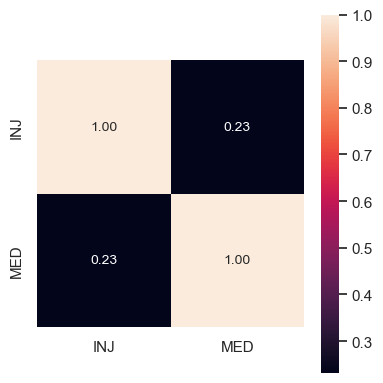

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,4))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr.values, cbar = True, annot = True, annot_kws = {'size':10},
                     fmt = '.2f', square = 'True', yticklabels = ['INJ','MED'], xticklabels = ['INJ','MED'])
plt.tight_layout()
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sys
from sklearn.preprocessing import MinMaxScaler


lr = LinearRegression()
    
# 독립변수/종속변수 설정
x = coin_df.loc[:,'INJ'].values
y = coin_df.loc[:,'MED'].values
    
# MinMax 정규화
scaler = MinMaxScaler()
      
scaler.fit(coin_df)
scaled_x = scaler.fit_transform(x.reshape(-1,1))
scaled_y = scaler.fit_transform(y.reshape(-1,1))

f = open('INJ_MED_corr_result.txt','w')

# x:INJ, y: MED
results = sm.OLS(y, sm.add_constant(scaled_x)).fit()
print(results.summary(),file=f)

    
f.close()

# ---------------------------------------
f = open('MED_INJ_corr_result.txt','w')

# x:MED, y: INJ
results = sm.OLS(x, sm.add_constant(scaled_y)).fit()
print(results.summary(),file=f)

    
f.close()

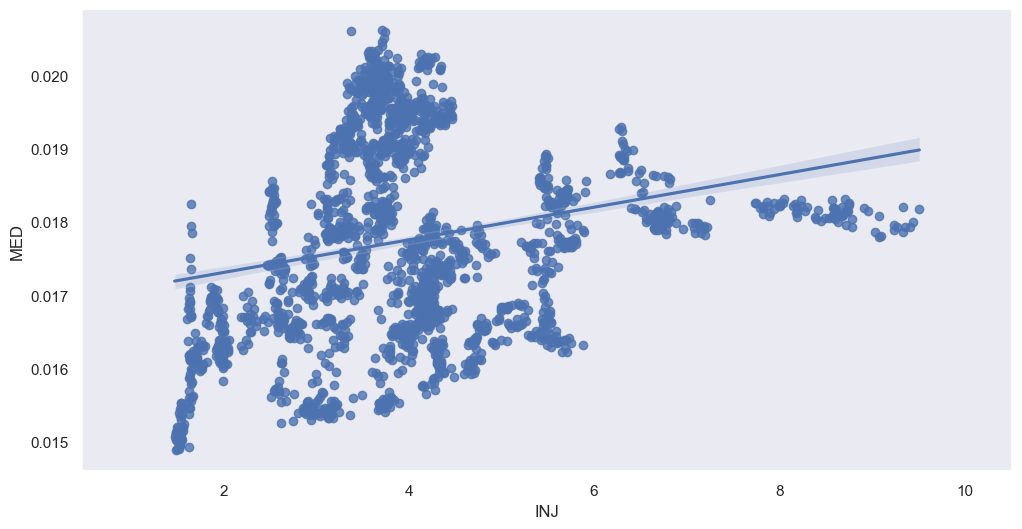

In [48]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='INJ', y='MED', data=coin_df)
plt.xlim(coin_df['INJ'].min()-1, coin_df['INJ'].max()+1)
plt.grid()
plt.show()

### BTC/ETH/BAND/COSMOS

In [111]:
coin_df = pd.DataFrame()
coin_df

""


In [112]:
coin_df['BTC'] = df[df["coin_name"]=='BTC'].open[:2170].values
coin_df['ETH'] = df[df["coin_name"]=='ETH'].open[:2170].values
coin_df['BAND'] = df[df["coin_name"]=='BAND'].open[:2170].values
coin_df['COSMOS'] = df[df["coin_name"]=='COSMOS'].open[:2170].values
coin_df

,BTC,ETH,BAND,COSMOS
0,21107.558016,1566.293957,1.873743,12.232794
1,21040.076655,1556.551528,1.861612,12.157150
2,21084.584716,1560.001666,1.861670,12.407452
3,21134.125270,1562.008465,1.859251,12.452014
4,21166.666441,1568.474264,1.871841,12.485118
...,...,...,...,...
2165,30009.004131,2103.147259,1.989412,12.541005
2166,29918.668866,2095.261356,1.990880,12.545338
2167,29854.464148,2091.045926,2.017066,12.643179
2168,29927.854396,2099.129734,1.990411,12.578552


In [99]:
corr = coin_df.corr(method = 'pearson')
corr

,BTC,ETH,BAND,COSMOS
BTC,1.000000,0.948103,-0.028243,-0.418534
ETH,0.948103,1.000000,0.096123,-0.288885
BAND,-0.028243,0.096123,1.000000,0.782363
COSMOS,-0.418534,-0.288885,0.782363,1.000000


In [113]:
coinlst = []
coinlst = ['BTC','ETH','BAND','COSMOS']

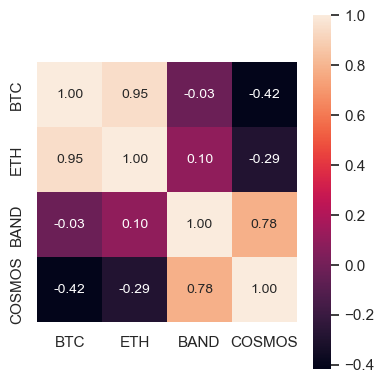

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,4))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr.values, cbar = True, annot = True, annot_kws = {'size':10},
                     fmt = '.2f', square = 'True', yticklabels = coinlst, xticklabels = coinlst)
plt.tight_layout()
plt.show()

In [85]:
X_data = coin_df[['BTC','ETH','BAND']]
y_data = coin_df['COSMOS']

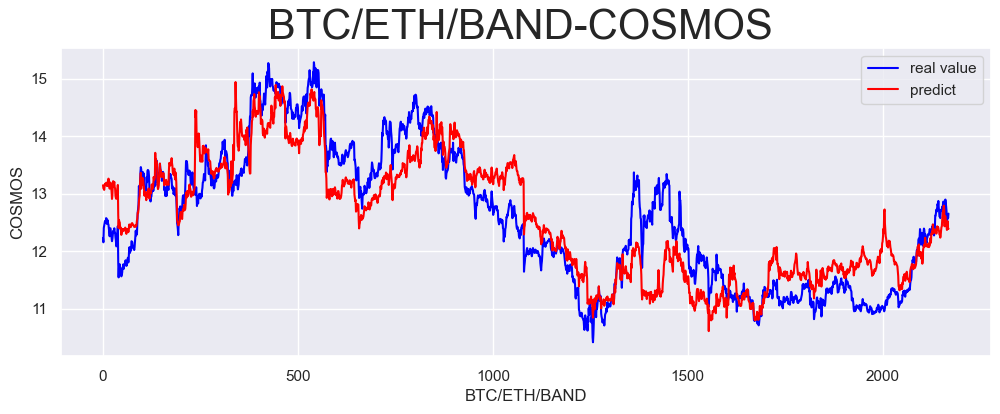

In [87]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X=pd.DataFrame(X_data),y = y_data)
lr_prediction = lr.predict(X = pd.DataFrame(X_data))

# 시각화
fig = plt.figure(figsize=(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(y_data, color = 'blue', label='real value' )
graph.plot(lr_prediction, color = 'red',label='predict')
graph.set_title('BTC/ETH/BAND-COSMOS ',size=30)
plt.xlabel('BTC/ETH/BAND')
plt.ylabel('COSMOS')
plt.legend(loc='best')

In [114]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sys
from sklearn.preprocessing import MinMaxScaler


lr = LinearRegression()

for i, coin in enumerate(coinlst):
    
    # 종속변수 설정
    X = coin_df[coin_df.columns.difference([coin])].values
    y = coin_df.loc[:,coin].values
    
    # MinMax 정규화
    scaler = MinMaxScaler()
      
    scaler.fit(coin_df)
    scaled_x = scaler.fit_transform(X)
    scaled_y = scaler.fit_transform(y.reshape(-1,1))

    # 독립변수를 데이터프레임 형태로 만들기
    columns = coin_df[coin_df.columns.difference([coin])].columns
    X_df = pd.DataFrame(scaled_x, columns=(columns))

    f = open('0.'+coin+'_corr_(4coin).txt','w')
    
    results = sm.OLS(y, sm.add_constant(X_df)).fit()
    print(results.summary(),file=f)

    
    f.close()

### 그외 코인

In [101]:
coin_list

array(['INJ', 'CRO', 'MED', 'ETH', 'COSMOS', 'KAVA', 'KDA', 'OSMO',
       'JUNO', 'RUNE', 'BTC', 'FET', 'BAND'], dtype=object)

In [115]:
c_list = np.delete(coin_list,(0,2,3,4,10,12))
c_list

array(['CRO', 'KAVA', 'KDA', 'OSMO', 'JUNO', 'RUNE', 'FET'], dtype=object)

In [116]:
coin_df = pd.DataFrame()
coin_df

""


In [117]:
for coin in c_list:
    tmp = df[df["coin_name"]==coin].open
    coin_df[coin] = tmp.values
coin_df

,CRO,KAVA,KDA,OSMO,JUNO,RUNE,FET
0,0.080169,0.897558,1.101403,0.831226,1.239070,1.760627,0.227899
1,0.079772,0.897669,1.091730,0.826484,1.224711,1.754713,0.228024
2,0.079059,0.899210,1.087384,0.835142,1.237521,1.747874,0.237760
3,0.079864,0.892201,1.098840,0.836380,1.246154,1.741208,0.251294
4,0.079901,0.902717,1.097884,0.837937,1.253271,1.745981,0.248855
...,...,...,...,...,...,...,...
2165,0.072024,0.942924,1.033470,0.855986,0.934410,1.651862,0.398924
2166,0.071823,0.941831,1.036852,0.853766,0.930968,1.649339,0.399622
2167,0.071729,0.939763,1.039466,0.856653,0.930253,1.652524,0.401775
2168,0.071556,0.934196,1.038464,0.856642,0.934704,1.647022,0.417481


In [118]:
corr = coin_df.corr(method = 'pearson')
corr

,CRO,KAVA,KDA,OSMO,JUNO,RUNE,FET
CRO,1.000000,0.386971,0.922501,0.885227,0.877087,0.850899,0.138913
KAVA,0.386971,1.000000,0.478768,0.322404,0.433550,0.380728,-0.241002
KDA,0.922501,0.478768,1.000000,0.850083,0.906411,0.865739,-0.054350
OSMO,0.885227,0.322404,0.850083,1.000000,0.874740,0.761087,0.269712
JUNO,0.877087,0.433550,0.906411,0.874740,1.000000,0.837671,-0.141413
RUNE,0.850899,0.380728,0.865739,0.761087,0.837671,1.000000,-0.064457
FET,0.138913,-0.241002,-0.054350,0.269712,-0.141413,-0.064457,1.000000


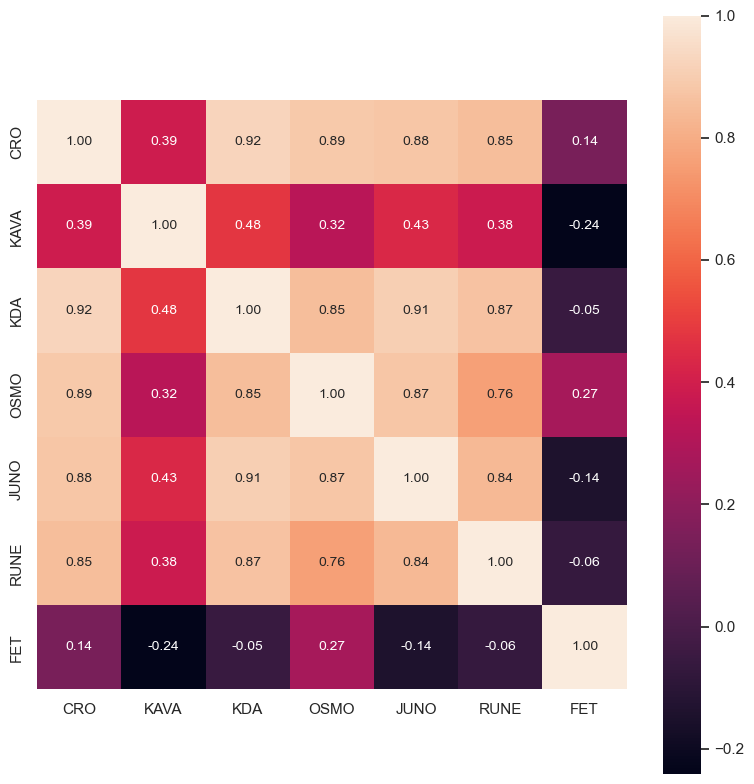

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,8))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(corr.values, cbar = True, annot = True, annot_kws = {'size':10},
                     fmt = '.2f', square = 'True', yticklabels = c_list, xticklabels = c_list)
plt.tight_layout()
plt.show()

In [120]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sys
from sklearn.preprocessing import MinMaxScaler


lr = LinearRegression()

for i, coin in enumerate(c_list):
    
    # 종속변수 설정
    X = coin_df[coin_df.columns.difference([coin])].values
    y = coin_df.loc[:,coin].values
    
    # MinMax 정규화
    scaler = MinMaxScaler()
      
    scaler.fit(coin_df)
    scaled_x = scaler.fit_transform(X)
    scaled_y = scaler.fit_transform(y.reshape(-1,1))

    # 독립변수를 데이터프레임 형태로 만들기
    columns = coin_df[coin_df.columns.difference([coin])].columns
    X_df = pd.DataFrame(scaled_x, columns=(columns))

    f = open('0.'+coin+'_corr_(rest).txt','w')
    
    results = sm.OLS(y, sm.add_constant(X_df)).fit()
    print(results.summary(),file=f)

    
    f.close()

In [121]:
X_data = coin_df[['CRO','KAVA','OSMO','JUNO','RUNE','FET']]
y_data = coin_df['KDA']

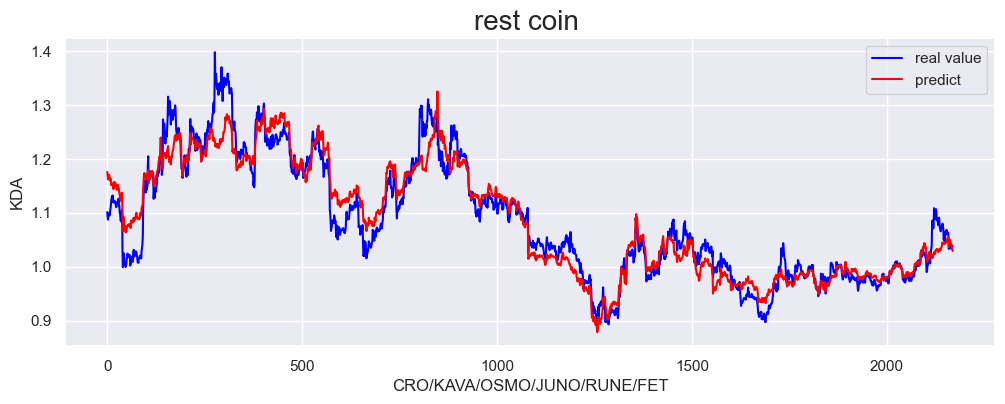

In [122]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X=pd.DataFrame(X_data),y = y_data)
lr_prediction = lr.predict(X = pd.DataFrame(X_data))

# 시각화
fig = plt.figure(figsize=(12,4))
graph = fig.add_subplot(1,1,1)
graph.plot(y_data, color = 'blue', label='real value' )
graph.plot(lr_prediction, color = 'red',label='predict')
graph.set_title('rest coin ',size=20)
plt.xlabel('CRO/KAVA/OSMO/JUNO/RUNE/FET')
plt.ylabel('KDA')
plt.legend(loc='best')